In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)


## 1. Read the dataset

In [2]:
data = pd.read_csv('KeepaExport-2024-03-22-ProductViewer.csv')
df = data.copy()
df.head()

/tmp/ipykernel_594991/1419418327.py:1: DtypeWarning: Columns (4,5,142,143,144,146,147,148,149,334,335,347,348,390,391,415,416,443,444) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('KeepaExport-2024-03-22-ProductViewer.csv')


,Amazon Trade-In Value: Current,Amazon Trade-In Value: 30 days avg.,Amazon Trade-In Value: 90 days avg.,Amazon Trade-In Value: 180 days avg.,Amazon Trade-In Value: 30 days drop %,Amazon Trade-In Value: 90 days drop %,Amazon Trade-In Value: Price drop since last visit,Amazon Trade-In Value: Drop % since last visit,Amazon Trade-In Value: Last visit,Amazon Trade-In Value: Lowest,Amazon Trade-In Value: Highest,Reviews: Review Count - 30 days drop %,New Offer Count: 30 days drop %,Used Offer Count: 30 days drop %,Refurbished Offer Count: 30 days drop %,Collectible Offer Count: 30 days drop %,Type,Locale,Image,Image Count,Title,Number of Pages,Binding,Sales Rank: Subcategory Sales Ranks,Bought in past month,Description & Features: Description,Description & Features: Feature 1,Description & Features: Feature 2,Description & Features: Feature 3,Description & Features: Feature 4,Description & Features: Feature 5,Description & Features: Feature 6,Description & Features: Feature 7,Description & Features: Feature 8,Description & Features: Feature 9,Description & Features: Feature 10,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Sales Rank: 180 days avg.,Sales Rank: 1 day drop %,Sales Rank: 7 days drop %,Sales Rank: 30 days drop %,Sales Rank: 90 days drop %,Sales Rank: Price drop since last visit,Sales Rank: Drop % since last visit,Sales Rank: Last visit,Sales Rank: Lowest,Sales Rank: Highest,Sales Rank: Drops last 30 days,Sales Rank: Drops last 90 days,Sales Rank: Drops last 180 days,Sales Rank: Reference,Reviews: Rating,Reviews: Review Count,Reviews: Review Count - 30 days avg.,Reviews: Review Count - 90 days avg.,Reviews: Review Count - 180 days avg.,Reviews: Review Count - 1 day drop %,Reviews: Review Count - 7 days drop %,Reviews: Review Count - 90 days drop %,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Last Update,Last Offer Update,Amazon: Current,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 1 day drop %,Amazon: 7 days drop %,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Price drop since last visit,Amazon: Drop % since last visit,Amazon: Last visit,Amazon: Lowest,Amazon: Highest,Amazon: Stock,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Amazon: Amazon offer shipping delay,MAP restriction,New: Current,Buy Box Seller,Buy Box: % Amazon 30 days,Buy Box: % Amazon 90 days,Buy Box: % Amazon 180 days,Buy Box: % Amazon 365 days,Buy Box: % Top Seller 30 days,Buy Box: % Top Seller 90 days,Buy Box: % Top Seller 180 days,Buy Box: % Top Seller 365 days,Buy Box: Winner Count 30 days,Buy Box: Winner Count 90 days,Buy Box: Winner Count 180 days,Buy Box: Winner Count 365 days,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: 1 day drop %,New: 7 days drop %,New: 30 days drop %,New: 90 days drop %,New: Price drop since last visit,New: Drop % since last visit,New: Last visit,New: Lowest,New: Highest,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 30 days avg.","New, 3rd Party FBA: 90 days avg.","New, 3rd Party FBA: 180 days avg.","New, 3rd Party FBA: 1 day drop %","New, 3rd Party FBA: 7 days drop %","New, 3rd Party FBA: 30 days drop %","New, 3rd Party FBA: 90 days drop %","New, 3rd Party FBA: Price drop since last visit","New, 3rd Party FBA: Drop % since last visit","New, 3rd Party FBA: Last visit","New, 3rd Party FBA: Lowest","New, 3rd Party FBA: Highest",Lowest FBA Seller,FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 30 days avg.","New, 3rd Party FBM 🚚: 90 days avg.","New, 3rd Party FBM 🚚: 180 days avg.","New, 3rd Party FBM 🚚: 1 day drop %","New, 3rd Party FBM 🚚: 7 days drop %","New, 3rd Party FBM 🚚: 30 days drop %","New, 3rd Party FBM 🚚: 90 days drop %","New, 3rd Party FBM 🚚: Price drop since last visit","New, 3rd Party FBM 🚚: Drop % since last visit","New, 3rd Party FBM 🚚: Last visit","New, 3rd Party FBM 🚚: Lowest","New, 3rd Party F

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 445 entries, Amazon Trade-In Value: Current to Amazon Trade-In Value: 7 days drop %
dtypes: float64(107), int64(2), object(336)
memory usage: 27.4+ MB


Based on the dataset's structure, it has 8057 rows and 445 columns, which includes:

* 107 float64 columns (likely numeric data for prices, sales ranks, percentages, etc.).
* 2 int64 columns (possibly counts or other integers).
* 336 object columns (likely categorical data, text, or dates).

The data occupies 27.4 MB, so it's manageable for Pandas, but preprocessing is crucial to focus on relevant data.

## 2. Clean the data

In [4]:
df = df.replace('-',np.nan)

In [5]:
# Let's clean columns containing '$' as it will be read as a string that we do not  need
columns_with_dollar = df.columns[df.apply(lambda col: col.astype(str).str.contains(r'\$\s*\d+(?:\.\d{1,2})?', na=False).any())]
columns_with_dollar.tolist()

['Title',
 'Description & Features: Description',
 'Description & Features: Feature 1',
 'Description & Features: Feature 2',
 'Description & Features: Feature 3',
 'Description & Features: Feature 4',
 'Description & Features: Feature 5',
 'Description & Features: Feature 7',
 'Amazon: Current',
 'Amazon: 30 days avg.',
 'Amazon: 90 days avg.',
 'Amazon: 180 days avg.',
 'Amazon: Price drop since last visit',
 'Amazon: Last visit',
 'Amazon: Lowest',
 'Amazon: Highest',
 'New: Current',
 'New: 30 days avg.',
 'New: 90 days avg.',
 'New: 180 days avg.',
 'New: Price drop since last visit',
 'New: Last visit',
 'New: Lowest',
 'New: Highest',
 'New, 3rd Party FBA: Current',
 'New, 3rd Party FBA: 30 days avg.',
 'New, 3rd Party FBA: 90 days avg.',
 'New, 3rd Party FBA: 180 days avg.',
 'New, 3rd Party FBA: Price drop since last visit',
 'New, 3rd Party FBA: Last visit',
 'New, 3rd Party FBA: Lowest',
 'New, 3rd Party FBA: Highest',
 'FBA Pick&Pack Fee',
 'Referral Fee based on current Bu

In [6]:
# Select only columns that are numeric and does not contain strings
# It starts with 'Amazon: Current' and ends with 'Trade-In: Highest':
columns_with_dollar = columns_with_dollar[8:-2]

In [7]:
columns_with_dollar.tolist()

['Amazon: Current',
 'Amazon: 30 days avg.',
 'Amazon: 90 days avg.',
 'Amazon: 180 days avg.',
 'Amazon: Price drop since last visit',
 'Amazon: Last visit',
 'Amazon: Lowest',
 'Amazon: Highest',
 'New: Current',
 'New: 30 days avg.',
 'New: 90 days avg.',
 'New: 180 days avg.',
 'New: Price drop since last visit',
 'New: Last visit',
 'New: Lowest',
 'New: Highest',
 'New, 3rd Party FBA: Current',
 'New, 3rd Party FBA: 30 days avg.',
 'New, 3rd Party FBA: 90 days avg.',
 'New, 3rd Party FBA: 180 days avg.',
 'New, 3rd Party FBA: Price drop since last visit',
 'New, 3rd Party FBA: Last visit',
 'New, 3rd Party FBA: Lowest',
 'New, 3rd Party FBA: Highest',
 'FBA Pick&Pack Fee',
 'Referral Fee based on current Buy Box price',
 'New, 3rd Party FBM 🚚: Current',
 'New, 3rd Party FBM 🚚: 30 days avg.',
 'New, 3rd Party FBM 🚚: 90 days avg.',
 'New, 3rd Party FBM 🚚: 180 days avg.',
 'New, 3rd Party FBM 🚚: Price drop since last visit',
 'New, 3rd Party FBM 🚚: Last visit',
 'New, 3rd Party FBM 

In [8]:
# Replace NaN with 0 in these columns
df[columns_with_dollar] = df[columns_with_dollar].fillna(0)

# Replace '$' and spaces in these columns only
df[columns_with_dollar] = df[columns_with_dollar].replace({'\$': '', '\s+': '', ',': ''}, regex=True)

# Convert these columns to numeric type
df[columns_with_dollar] = df[columns_with_dollar].apply(pd.to_numeric)

In [9]:
df[columns_with_dollar]

,Amazon: Current,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: Price drop since last visit,Amazon: Last visit,Amazon: Lowest,Amazon: Highest,New: Current,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: Price drop since last visit,New: Last visit,New: Lowest,New: Highest,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 30 days avg.","New, 3rd Party FBA: 90 days avg.","New, 3rd Party FBA: 180 days avg.","New, 3rd Party FBA: Price drop since last visit","New, 3rd Party FBA: Last visit","New, 3rd Party FBA: Lowest","New, 3rd Party FBA: Highest",FBA Pick&Pack Fee,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 30 days avg.","New, 3rd Party FBM 🚚: 90 days avg.","New, 3rd Party FBM 🚚: 180 days avg.","New, 3rd Party FBM 🚚: Price drop since last visit","New, 3rd Party FBM 🚚: Last visit","New, 3rd Party FBM 🚚: Lowest","New, 3rd Party FBM 🚚: Highest","New, Prime exclusive: Current","New, Prime exclusive: 30 days avg.","New, Prime exclusive: 90 days avg.","New, Prime exclusive: 180 days avg.","New, Prime exclusive: Lowest","New, Prime exclusive: Highest",Used: Current,Used: 30 days avg.,Used: 90 days avg.,Used: 180 days avg.,Used: Price drop since last visit,Used: Last visit,Used: Lowest,Used: Highest,List Price: Current,List Price: 30 days avg.,List Price: 90 days avg.,List Price: 180 days avg.,List Price: Price drop since last visit,List Price: Last visit,List Price: Lowest,List Price: Highest,Buy Box Used 🚚: Current,Buy Box Used 🚚: 30 days avg.,Buy Box Used 🚚: 90 days avg.,Buy Box Used 🚚: 180 days avg.,Buy Box Used 🚚: Lowest,Buy Box Used 🚚: Highest,Warehouse Deals: Current,Warehouse Deals: 30 days avg.,Warehouse Deals: 90 days avg.,Warehouse Deals: 180 days avg.,Warehouse Deals: Price drop since last visit,Warehouse Deals: Last visit,Warehouse Deals: Lowest,Warehouse Deals: Highest,Collectible: Current,Collectible: 30 days avg.,Collectible: 90 days avg.,Collectible: 180 days avg.,Collectible: Price drop since last visit,Collectible: Last visit,Collectible: Lowest,Collectible: Highest,Refurbished: Lowest,Refurbished: Highest,Buy Box 🚚: Current,Buy Box 🚚: 30 days avg.,Buy Box 🚚: 90 days avg.,Buy Box 🚚: 180 days avg.,Buy Box 🚚: Price drop since last visit,Buy Box 🚚: Last visit,Buy Box 🚚: Lowest,Buy Box 🚚: Highest,Competitive Price Threshold,"Used, like new 🚚: Current","Used, like new 🚚: 30 days avg.","Used, like new 🚚: 90 days avg.","Used, like new 🚚: 180 days avg.","Used, like new 🚚: Price drop since last visit","Used, like new 🚚: Last visit","Used, like new 🚚: Lowest","Used, like new 🚚: Highest","Used, very good 🚚: Current","Used, very good 🚚: 30 days avg.","Used, very good 🚚: 90 days avg.","Used, very good 🚚: 180 days avg.","Used, very good 🚚: Price drop since last visit","Used, very good 🚚: Last visit","Used, very good 🚚: Lowest","Used, very good 🚚: Highest","Used, good 🚚: Current","Used, good 🚚: 30 days avg.","Used, good 🚚: 90 days avg.","Used, good 🚚: 180 days avg.","Used, good 🚚: Price drop since last visit","Used, good 🚚: Last visit","Used, good 🚚: Lowest","Used, good 🚚: Highest","Used, acceptable 🚚: Current","Used, acceptable 🚚: 30 days avg.","Used, acceptable 🚚: 90 days avg.","Used, acceptable 🚚: 180 days avg.","Used, acceptable 🚚: Price drop since last visit","Used, acceptable 🚚: Last visit","Used, acceptable 🚚: Lowest","Used, acceptable 🚚: Highest",eBay New 🚚: Current,eBay New 🚚: 30 days avg.,eBay New 🚚: 90 days avg.,eBay New 🚚: 180 days avg.,eBay New 🚚: Price drop since last visit,eBay New 🚚: Last visit,eBay New 🚚: Lowest,eBay New 🚚: Highest,eBay Used 🚚: Current,eBay Used 🚚: 30 days avg.,eBay Used 🚚: 90 days avg.,eBay Used 🚚: 180 days avg.,eBay Used 🚚: Price drop since last visit,eBay Used 🚚: Last visit,eBay Used 🚚: Lowest,eBay Used 🚚: Highest,Trade-In: Lowest,Trade-In: Highest
0,68.26,59.67,45.54,49.74,0.0,0.0,26.20,79.99,68.26,59.56,44.71,48.18,0.00,0.00,26.20,79.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.25,10.25,0.00,77.00,49.60,

In [10]:
# There are many columns with emtpy rows and with rows that have few observations. We can remove the columns where data above some threshold value is missing
# Let's set the threshold for missing values
missing_threshold = 1
# Calculate the percentage of missing values per column
missing_percent = df.isnull().mean()
# Identify columns where missing values exceed the threshold
columns_to_drop = missing_percent[missing_percent >= missing_threshold].index
len(columns_to_drop)

46

In [11]:
columns_to_drop.tolist()

['Amazon Trade-In Value: Current',
 'Amazon Trade-In Value: 30 days avg.',
 'Amazon Trade-In Value: 90 days avg.',
 'Amazon Trade-In Value: 180 days avg.',
 'Amazon Trade-In Value: Price drop since last visit',
 'Amazon Trade-In Value: Drop % since last visit',
 'Amazon Trade-In Value: Last visit',
 'Amazon Trade-In Value: Lowest',
 'Amazon Trade-In Value: Highest',
 'Refurbished Offer Count: 30 days drop %',
 'New, Prime exclusive: Price drop since last visit',
 'New, Prime exclusive: Drop % since last visit',
 'New, Prime exclusive: Last visit',
 'Lightning Deals: Current',
 'Buy Box Used 🚚: Price drop since last visit',
 'Buy Box Used 🚚: Drop % since last visit',
 'Buy Box Used 🚚: Last visit',
 'Refurbished: Current',
 'Refurbished: 30 days avg.',
 'Refurbished: 90 days avg.',
 'Refurbished: 180 days avg.',
 'Refurbished: 1 day drop %',
 'Refurbished: 7 days drop %',
 'Refurbished: 30 days drop %',
 'Refurbished: 90 days drop %',
 'Refurbished: Price drop since last visit',
 'Refurb

In [12]:
# Drop these columns
df = df.drop(columns=columns_to_drop)

In [13]:
df['Locale'].unique()

array(['com'], dtype=object)

In [14]:
# We can drop 'Locale' column because it's value is constant
df = df.drop(columns='Locale')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 398 entries, Amazon Trade-In Value: 30 days drop % to Amazon Trade-In Value: 7 days drop %
dtypes: float64(200), int64(2), object(196)
memory usage: 24.5+ MB


In [16]:
df.to_csv("keepa_data_cleaned.csv", index=False)

## 3. Product analysis

In [17]:
df['Categories: Root'].unique()

array(['Home & Kitchen', 'Grocery & Gourmet Food', 'Health & Household',
       nan, 'Appliances', 'Automotive', 'Office Products',
       'Sports & Outdoors', 'Electronics', 'Clothing, Shoes & Jewelry',
       'Patio, Lawn & Garden', 'Tools & Home Improvement',
       'Industrial & Scientific', 'Toys & Games', 'Pet Supplies',
       'Beauty & Personal Care', 'Baby Products', 'Arts, Crafts & Sewing',
       'Books', 'Video Games', 'Cell Phones & Accessories',
       'Musical Instruments', 'Stores', 'CDs & Vinyl'], dtype=object)

In [18]:
len(df['Categories: Root'].unique())

24

In [19]:
IME_SELLER_ID = 'A1BZ5E31ZCG12M'

In [20]:

df['Buy Box Seller'] = np.where(df['Buy Box Seller'].str.contains(IME_SELLER_ID, na=False), 'IMEBrands', df['Buy Box Seller'])
df['Lowest FBA Seller'] = np.where(df['Lowest FBA Seller']==IME_SELLER_ID, 'IMEBrands',df['Lowest FBA Seller'])
df['Lowest FBM Seller'] = np.where(df['Lowest FBM Seller']==IME_SELLER_ID, 'IMEBrands',df['Lowest FBM Seller'])


In [21]:
reduced_df = df[['Title','ASIN','Brand','Categories: Root', 'Type',
    'Sales Rank: Current','Reviews: Rating','Reviews: Review Count',
    'Last Price Change','Amazon: Current','Amazon: Lowest',
    'Amazon: Highest', 'New: Current','Buy Box Seller','Manufacturer','Lowest FBA Seller',
    'Lowest FBM Seller','List Price: Current','Buy Box 🚚: Current',
    'Competitive Price Threshold','Suggested Lower Price',]]
reduced_df.head()

,Title,ASIN,Brand,Categories: Root,Type,Sales Rank: Current,Reviews: Rating,Reviews: Review Count,Last Price Change,Amazon: Current,Amazon: Lowest,Amazon: Highest,New: Current,Buy Box Seller,Manufacturer,Lowest FBA Seller,Lowest FBM Seller,List Price: Current,Buy Box 🚚: Current,Competitive Price Threshold,Suggested Lower Price
0,"TaoTronics HEPA Air Purifier for Home, Allerge...",B0882VT6G7,TaoTronics,Home & Kitchen,AIR_PURIFIER,127841.0,4.7,9519.0,2024/03/20 06:52,68.26,26.20,79.99,68.26,Amazon,TaoTronics,NaN,IMEBrands,79.99,68.26,0.0,NaN
1,Pepsi Soda 20oz Bottles (Pack of 10),B0CGJV2Z68,B4Y,Grocery & Gourmet Food,DRINK_FLAVORED,176909.0,NaN,NaN,2024/03/22 04:48,0.00,0.00,0.00,29.45,3rd Party (A2QPOTRJLGHS5J),B4Y,NaN,A2LM7VTZ4M9M65,0.00,30.72,0.0,NaN
2,Pepsi Soda 20oz Bottles (Pack of 12),B0BMT2LF9P,B4Y,Grocery & Gourmet Food,DRINK_FLAVORED,69748.0,5.0,10.0,2024/03/22 01:16,0.00,0.00,0.00,30.99,3rd Party (A35TTCY7ZJ1G4O),B4Y,NaN,A2BD8VPC5GDLIB,0.00,31.99,0.0,NaN
3,"Pepsi Soda 20oz Bottles (Pack of 16, Total of ...",B0BMPJ637W,B4Y,Grocery & Gourmet Food,DRINK_FLAVORED,402502.0,5.0,1.0,2024/03/21 17:04,0.00,0.00,0.00,47.98,3rd Party (A2QPOTRJLGHS5J),B4Y,NaN,A2QPOTRJLGHS5J,0.00,48.00,0.0,NaN
4,"Clamato Original Tomato Cocktail, 5.5 fl oz ca...",B0025UOOVE,Clamato,Grocery & Gourmet Food,GROCERY,9222.0,4.8,1682.0,2024/03/20 14:00,0.00,11.62,42.04,36.99,3rd Party (A2UTB759J8X077),Clamato,A2UTB759J8X077,IMEBrands,0.00,36.99,0.0,NaN


In [22]:
reduced_df.sort_values(by='Sales Rank: Current').head()

,Title,ASIN,Brand,Categories: Root,Type,Sales Rank: Current,Reviews: Rating,Reviews: Review Count,Last Price Change,Amazon: Current,Amazon: Lowest,Amazon: Highest,New: Current,Buy Box Seller,Manufacturer,Lowest FBA Seller,Lowest FBM Seller,List Price: Current,Buy Box 🚚: Current,Competitive Price Threshold,Suggested Lower Price
2771,Premier Protein Shake Limited Edition 30g 1g S...,B07W6B8ZLZ,Premier Protein,Grocery & Gourmet Food,PROTEIN_DRINK,2.0,4.5,204385.0,2024/03/14 22:14,28.34,19.99,29.99,28.34,Amazon,Premier Nutrition,IMEBrands,ACTLVD2GWDCFF,29.99,28.34,0.00,NaN
4653,Stanley IceFlow Stainless Steel Water Jug with...,B08RXS2BFV,STANLEY,Home & Kitchen,THERMOS,4.0,4.6,23911.0,2024/02/04 07:48,0.00,29.12,45.00,0.00,NaN,Stanley,NaN,NaN,0.00,0.00,0.00,NaN
4818,Fancy Feast Grilled Liver And Chicken Feast In...,B000X916WY,PURINA Fancy Feast,Pet Supplies,PET_FOOD,4.0,4.7,83566.0,2024/03/13 20:00,0.00,0.00,0.00,29.70,NaN,Fancy Feast,A3JC9UG1DXZJCB,A1QO030S1C0NC5,0.00,0.00,20.47,2542.0
3879,"Hammermill Printer Paper, 20 lb Copy Paper, 11...",B0185KP7QS,Hammermill,Office Products,PRINT_COPY_PAPER,4.0,4.7,42065.0,2024/03/22 17:56,88.43,44.99,132.45,87.70,Amazon,Sylvamo,NaN,A1UEW3GW612BDQ,0.00,88.43,0.00,NaN
1483,"Monster Energy Ultra Peachy Keen, Sugar Free E...",B09QNVLPWM,Monster Energy,Grocery & Gourmet Food,GROCERY,6.0,4.7,70453.0,2024/03/22 07:06,0.00,36.64,80.45,59.99,3rd Party (A1H15CQ35R7NEY),Monster Energy Company,NaN,"A1A6EJ7WW2ZQRJ, A1H15CQ35R7NEY",0.00,61.95,36.78,3678.0


In [23]:
# Grouping Categories over Sales rank
reduced_df.groupby(['Categories: Root','Brand','Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Sales Rank: Current'].min().sort_values().head(20)

Categories: Root        Brand            Lowest FBA Seller                                             Lowest FBM Seller               Buy Box Seller            
Grocery & Gourmet Food  Premier Protein  IMEBrands                                                     ACTLVD2GWDCFF                   Amazon                         2.0
                        Starbucks        A3R8FRN6P9FT3S, AYJ97XRA8XNAN, AKJDC3PC6IGEO                  A42RLHP12DEXD                   3rd Party (A42RLHP12DEXD)      7.0
                                         A2CA25H4CUPMCR                                                A39I5Q8PDKHKY4, A2KQRY5FUFHYEV  3rd Party (A2CA25H4CUPMCR)     7.0
                                         A22VUJNZKBWV                                                  A4126JU4VG2XP, A2GIJ6RURFELEY   3rd Party (A4126JU4VG2XP)      7.0
                                         A22IZZ8HYYQWD2                                                AM01HGKD40IY8                   3rd Party (A22IZZ8HYYQW

In [24]:
# Grouping by Title over Sales Rank
reduced_df.groupby(['Title', 'Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Sales Rank: Current'].min().sort_values().head(20)

Title                                                                                                                                                             Lowest FBA Seller                                             Lowest FBM Seller               Buy Box Seller            
Premier Protein Shake Limited Edition 30g 1g Sugar 24 Vitamins Minerals Nutrients to Support Immune Health, Pumpkin Spice, 11.5 Fl Oz (Pack of 12)                IMEBrands                                                     ACTLVD2GWDCFF                   Amazon                         2.0
Starbucks 72 Count Sumatra Coffee, 0.41 Ounce                                                                                                                     A22IZZ8HYYQWD2                                                AM01HGKD40IY8                   3rd Party (A22IZZ8HYYQWD2)     7.0
Starbucks Coffee Holiday Blend Coffee K Cups - 44 K Cups Total - 22 K Cups Per Box - Seasonal Limited Edition Starbucks Coffee - For Us

In [25]:
# Grouping by Categories over Review rating
reduced_df.groupby(['Categories: Root','Brand','Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Reviews: Rating'].min().sort_values(ascending=False).head(20)

Categories: Root        Brand                          Lowest FBA Seller               Lowest FBM Seller               Buy Box Seller            
Grocery & Gourmet Food  Halloren                       A10524CX5HZTR5                  A1P0RNOIFZVXCZ                  3rd Party (A1P0RNOIFZVXCZ)    5.0
                        Kellogg's                      A2WYIL3RINJAP0, A2FX7B9H0IZY3R  A29QTKA1LZ3PUB                  3rd Party (A3PTVZEAMUF6L5)    5.0
Beauty & Personal Care  Wet Brush                      A9E802X78SV0A                   A2PW7CU4M5WJKF                  3rd Party (A2PW7CU4M5WJKF)    5.0
Health & Household      Downy                          A3LF79IUNUDUK9                  AS7E87OTQJQBJ                   3rd Party (A17H6MN4F31MEB)    5.0
                        Hairless Brush                 AGAWV6UDEBU75                   A3NRX1HGKYZPFN                  3rd Party (A3SICV5YB0594S)    5.0
Grocery & Gourmet Food  HELLMANN'S                     AM1F9R1ISVDUM                   A2

In [26]:
reduced_df.groupby(['Categories: Root','Brand','Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Reviews: Rating'].min().sort_values(ascending=False).tail(20)

Categories: Root          Brand           Lowest FBA Seller               Lowest FBM Seller                              Buy Box Seller            
Grocery & Gourmet Food    Sweetzo         A2BQADMAX927OJ                  A751IHK579C55                                  3rd Party (A2BQADMAX927OJ)   NaN
Health & Household        Hairless Brush  A1S35HYQYY9PD                   IMEBrands                                      IMEBrands                    NaN
                          ruma            A2IF6WO3RUOYY3                  A126KCOQ6DZGCW                                 3rd Party (A2IF6WO3RUOYY3)   NaN
Home & Kitchen            Cuisinart       A2S62NX9HQT3G0                  A2ITYJYTOW2Y23                                 3rd Party (A2ITYJYTOW2Y23)   NaN
                          Ello            A12C18TAXB67TL                  AENNYUHLFGJW3, A38QDPY9KKCNDK                  3rd Party (A2YCLIB584P6RU)   NaN
                                          A2SEKWSBBHBHVO                  A2YCLIB5

In [27]:
# Grouping by Title over Review rating (top perfomers)
reduced_df.groupby(['Title', 'Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Reviews: Rating'].min().sort_values(ascending=False).head(20)

Title                                                                                                                                             Lowest FBA Seller               Lowest FBM Seller               Buy Box Seller            
Nature Bount Magnesium Glycinate High Absorption 240 mg, 180 Capsules                                                                             AGAWV6UDEBU75                   A3NRX1HGKYZPFN                  3rd Party (A3SICV5YB0594S)    5.0
KELLOGGS ENTERTAINMENT CRACKERS 52OZ 3.25LMS                                                                                                      A2WYIL3RINJAP0, A2FX7B9H0IZY3R  A29QTKA1LZ3PUB                  3rd Party (A3PTVZEAMUF6L5)    5.0
Tabasco Pepper Sauce, Original Flavor, 2-Ounce Bottles (Pack of 24)                                                                               A3I07C5PD33KVE                  A2YRF1B48A4W5J                  3rd Party (A1445PNXPJJ7VX)    5.0
Jolly Rancher Original Flavor C

In [28]:
# Grouping by Title over Review rating (worst perfomers)
reduced_df.groupby(['Title', 'Lowest FBA Seller', 'Lowest FBM Seller', 'Buy Box Seller'])['Reviews: Rating'].min().sort_values(ascending=False).tail(20)

Title                                                                                                                                                                                        Lowest FBA Seller               Lowest FBM Seller                              Buy Box Seller            
Member's Mark Copper Antique Bird Feeder                                                                                                                                                     A2K6RXKS96SCTZ                  IMEBrands                                      3rd Party (A3GDJTD5LFJMWH)   NaN
Member's Mark Outdoor Adventure 10 Piece Set (Fishing)                                                                                                                                       A1FH7TJR749OTI                  A3VTZ0QSHW1UHP                                 3rd Party (A1FH7TJR749OTI)   NaN
Member's Mark Outdoor Adventure 10-Piece Set (Hunting)                                                 

In [ ]:
# Let's explore Reviews given by customers to IMEBrands sold prooducts
# Ensure relevant columns are strings and handle NaN
reduced_df.loc[:, 'Buy Box Seller'] = reduced_df['Buy Box Seller'].fillna('').astype(str)
reduced_df.loc[:, 'Lowest FBA Seller'] = reduced_df['Lowest FBA Seller'].fillna('').astype(str)
reduced_df.loc[:, 'Lowest FBM Seller'] = reduced_df['Lowest FBM Seller'].fillna('').astype(str)


# Filter rows where IME_SELLER_ID is in any of the relevant columns
filtered_df = reduced_df[
    (reduced_df['Lowest FBA Seller'] == 'IMEBrands') |
    (reduced_df['Lowest FBM Seller'] == 'IMEBrands') |
    (reduced_df['Buy Box Seller'] == 'IMEBrands')
]
filtered_df['Reviews: Rating'].value_counts()


Reviews: Rating
4.4    133
5.0    109
4.6     90
4.5     81
4.3     80
4.2     76
4.7     66
4.1     59
4.0     50
4.8     44
3.9     33
3.8     21
3.7     20
3.6     13
3.1     12
3.0     11
4.9      9
3.5      9
3.4      7
1.0      7
3.2      6
3.3      6
2.0      4
2.4      4
2.5      3
2.7      3
2.6      2
2.9      1
1.5      1
2.3      1
2.1      1
2.2      1
Name: count, dtype: int64

In [70]:
filtered_df.sort_values(by='Reviews: Review Count',ascending=False)[['Title','Brand','Categories: Root','Sales Rank: Current','Reviews: Review Count']].head(20)

,Title,Brand,Categories: Root,Sales Rank: Current,Reviews: Review Count
2771,Premier Protein Shake Limited Edition 30g 1g S...,Premier Protein,Grocery & Gourmet Food,2.0,204385.0
1318,Campbell's Simply Campbell's Chiciken Noodles ...,Campbell's,Grocery & Gourmet Food,35.0,101498.0
1286,Starbucks Medium Roast Holiday Blend Ground Co...,Starbucks,Grocery & Gourmet Food,82.0,56982.0
1125,"RITZ Bits Cheese Sandwich Crackers, 60 - 1.5 o...",Ritz,Grocery & Gourmet Food,409.0,38613.0
3106,"Under Armour Adult Charged Cotton Crew Socks, ...",Under Armour,"Clothing, Shoes & Jewelry",12100.0,37307.0
6429,"Aqua Joe SJI-OMS20 Aqua Joe 4,400 Sq Ft Covera...",Aqua Joe,"Patio, Lawn & Garden",4690.0,35380.0
3080,Gamma2 Vittles Vault Stackable Dog Food Storag...,Gamma2,Pet Supplies,2191.0,32665.0
346,Rubbermaid Commercial Products Resin Wastebask...,Rubbermaid,Industrial & Scientific,24.0,31103.0
821,"Pampers Cruisers Diapers - Size 7, 70 Count, D...",Pampers,Baby Products,315.0,26553.0
1303,"V8 Original 100% Vegetable Juice, Vegetable Bl...",V8,Grocery & Gourmet Food,926.0,21244.0


## 3. Filter the Dataset
### Goal: 
* Focus the analysis on your target company's product categories: Towels, Dried Fruits, Snack Boxes, Shampoo, Socks, Lazy Air Beds, Camping Pads, Tents, and Sleeping Bags.
### Action:
* Identify relevant products in the dataset using columns like Categories: Sub, Categories: Root, Title, or any other category-related information.
* Create a filtered dataframe for these categories to streamline subsequent analysis.

In [73]:
ime_df = df[(~df['Buy Box Seller'].isna()) & (df['Buy Box Seller']=='IMEBrands')]
ime_df

,Amazon Trade-In Value: 30 days drop %,Amazon Trade-In Value: 90 days drop %,Reviews: Review Count - 30 days drop %,New Offer Count: 30 days drop %,Used Offer Count: 30 days drop %,Collectible Offer Count: 30 days drop %,Type,Image,Image Count,Title,Number of Pages,Binding,Sales Rank: Subcategory Sales Ranks,Bought in past month,Description & Features: Description,Description & Features: Feature 1,Description & Features: Feature 2,Description & Features: Feature 3,Description & Features: Feature 4,Description & Features: Feature 5,Description & Features: Feature 6,Description & Features: Feature 7,Description & Features: Feature 8,Description & Features: Feature 9,Description & Features: Feature 10,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Sales Rank: 180 days avg.,Sales Rank: 1 day drop %,Sales Rank: 7 days drop %,Sales Rank: 30 days drop %,Sales Rank: 90 days drop %,Sales Rank: Price drop since last visit,Sales Rank: Drop % since last visit,Sales Rank: Last visit,Sales Rank: Lowest,Sales Rank: Highest,Sales Rank: Drops last 30 days,Sales Rank: Drops last 90 days,Sales Rank: Drops last 180 days,Sales Rank: Reference,Reviews: Rating,Reviews: Review Count,Reviews: Review Count - 30 days avg.,Reviews: Review Count - 90 days avg.,Reviews: Review Count - 180 days avg.,Reviews: Review Count - 1 day drop %,Reviews: Review Count - 7 days drop %,Reviews: Review Count - 90 days drop %,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Last Update,Last Offer Update,Amazon: Current,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 1 day drop %,Amazon: 7 days drop %,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Price drop since last visit,Amazon: Drop % since last visit,Amazon: Last visit,Amazon: Lowest,Amazon: Highest,Amazon: Stock,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Amazon: Amazon offer shipping delay,MAP restriction,New: Current,Buy Box Seller,Buy Box: % Amazon 30 days,Buy Box: % Amazon 90 days,Buy Box: % Amazon 180 days,Buy Box: % Amazon 365 days,Buy Box: % Top Seller 30 days,Buy Box: % Top Seller 90 days,Buy Box: % Top Seller 180 days,Buy Box: % Top Seller 365 days,Buy Box: Winner Count 30 days,Buy Box: Winner Count 90 days,Buy Box: Winner Count 180 days,Buy Box: Winner Count 365 days,New: 30 days avg.,New: 90 days avg.,New: 180 days avg.,New: 1 day drop %,New: 7 days drop %,New: 30 days drop %,New: 90 days drop %,New: Price drop since last visit,New: Drop % since last visit,New: Last visit,New: Lowest,New: Highest,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 30 days avg.","New, 3rd Party FBA: 90 days avg.","New, 3rd Party FBA: 180 days avg.","New, 3rd Party FBA: 1 day drop %","New, 3rd Party FBA: 7 days drop %","New, 3rd Party FBA: 30 days drop %","New, 3rd Party FBA: 90 days drop %","New, 3rd Party FBA: Price drop since last visit","New, 3rd Party FBA: Drop % since last visit","New, 3rd Party FBA: Last visit","New, 3rd Party FBA: Lowest","New, 3rd Party FBA: Highest",Lowest FBA Seller,FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 30 days avg.","New, 3rd Party FBM 🚚: 90 days avg.","New, 3rd Party FBM 🚚: 180 days avg.","New, 3rd Party FBM 🚚: 1 day drop %","New, 3rd Party FBM 🚚: 7 days drop %","New, 3rd Party FBM 🚚: 30 days drop %","New, 3rd Party FBM 🚚: 90 days drop %","New, 3rd Party FBM 🚚: Price drop since last visit","New, 3rd Party FBM 🚚: Drop % since last visit","New, 3rd Party FBM 🚚: Last visit","New, 3rd Party FBM 🚚: Lowest","New, 3rd Party FBM 🚚: Highest",Lowest FBM Seller,"New, Prime exclusive: Current","New, Prime exclusive: 30 days avg.","New, Prime exclusive: 90 days avg.","New, Prime exclusive: 180 days avg.","New, Prime exclusive: 1 day drop %","New, Prime exclusive: 7 days drop %","New, Prime exclusive: 30 days drop %","New, Prime exclusive: 90 days drop %","New, Prime exclusive: Lowest","New, Prime exclusi

In [74]:
ime_categories = ime_df['Categories: Root'].unique().tolist()
ime_categories

['Grocery & Gourmet Food',
 'Home & Kitchen',
 nan,
 'Health & Household',
 'Sports & Outdoors',
 'Clothing, Shoes & Jewelry',
 'Patio, Lawn & Garden',
 'Tools & Home Improvement',
 'Toys & Games',
 'Industrial & Scientific',
 'Pet Supplies',
 'Office Products',
 'Automotive',
 'Beauty & Personal Care',
 'Electronics',
 'Video Games']

In [75]:
ime_df[ime_df['Categories: Root']=='Pet Supplies']['Title']

287     Purina 178108 Puppy Chow Complete Pet Food, 32...
1277    Friskies Shredded Cat Food (48/5.5 OZ Net Wt 2...
1934    2 Set. Concord Import Member S Mark Dental Che...
3836    Orient Therapy Pet Odor Eliminator Spray with ...
3837    Orient Therapy Lavender Pet Shampoo for Dogs &...
Name: Title, dtype: object

In [76]:
ime_df[ime_df['Categories: Root'].isna()]['Type']

48             CHOCOLATE_CANDY
67                       JERKY
273                      JERKY
587                    CRACKER
730                SUGAR_CANDY
                 ...          
3805                      ROBE
3806                       NaN
3807                       NaN
4040                    PICKLE
5431    NON_RIDING_TOY_VEHICLE
Name: Type, Length: 99, dtype: object

## 3.1. Alternative way of filtering the data

In [78]:
# Example filtering based on product categories
target_categories = [
    "Towels", "Dried Fruits", "Snack Boxes", "Shampoo", 
    "Socks", "Lazy Air Beds", "Camping Pads", "Tents", "Sleeping Bags"
]

# Check which columns to filter by
df_filtered = df[df['Categories: Sub'].str.contains('|'.join(target_categories), case=False, na=False)]
# Display filtered dataframe info
print(f"Filtered dataset contains {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns.")

Filtered dataset contains 206 rows and 398 columns.


In [40]:
df_filtered['Categories: Sub'].unique()

array(['All-Purpose Cleaners, Paper Towels/Cleaning Supplies, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning',
       'All-Purpose Cleaners, Home cleaning, All Purpose & Disinfectant Wipes, Under $6 cleaning supplies, Paper Towels/Cleaning Supplies',
       'Paper Towels, Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Back to school, SpringCleaning2023',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Save on everyday essentials',
       'Cooktop Cleaners, Paper Towels/Cleaning Supplies, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning',
       'Metal Polishes, Paper Towels/Cleaning Supplies, Wood & Metal Polishes, Under $6 cleaning supplies, All Purpose & Disinfectant Wipes, Home cleaning, Metal & Wood Polishes',
       'Paper Towels, Paper Towels/Cleaning Supplies, Paper Essentials, Paper Towels',
       'Calf Socks'

### Analysis of Subcategories
* **Direct Matches**: Some subcategories like Shampoos, Socks, Tents, and Sleeping Bags match the target categories.
* **Relevant but Broad Matches**: Subcategories like Camping & Hiking, Men, Socks or Paper Towels, Paper Essentials need evaluation to determine their relevance.
* **Irrelevant Matches**: Categories like Glass Cleaners or Metal Polishes seem unrelated to your target categories.

In [41]:
# Let's look at the root categories of the filtered data
df_filtered['Categories: Root'].unique()

array(['Health & Household', 'Industrial & Scientific',
       'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Baby Products',
       'Grocery & Gourmet Food', 'Beauty & Personal Care',
       'Home & Kitchen', 'Pet Supplies', 'Toys & Games'], dtype=object)

### Refining Based on Root Categories

We will refine the dataset using the root categories that are relevant to our target company's product types. The mapping between target categories and root categories is as follows:

| **Target Category** | **Relevant Root Categories**                        |
|----------------------|----------------------------------------------------|
| Towels              | `Home & Kitchen`                                   |
| Dried Fruits        | `Grocery & Gourmet Food`                           |
| Snack Boxes         | `Grocery & Gourmet Food`                           |
| Shampoo             | `Beauty & Personal Care`                           |
| Socks               | `Clothing, Shoes & Jewelry`                        |
| Lazy Air Beds       | `Sports & Outdoors`, `Home & Kitchen`              |
| Camping Pads        | `Sports & Outdoors`                                |
| Tents               | `Sports & Outdoors`                                |
| Sleeping Bags       | `Sports & Outdoors`                                |


In [42]:
# Define the mapping of target categories to root categories
relevant_root_categories = [
    "Home & Kitchen",
    "Grocery & Gourmet Food",
    "Beauty & Personal Care",
    "Clothing, Shoes & Jewelry",
    "Sports & Outdoors"
]

# Filter the dataset based on relevant root categories
filtered_by_root = df_filtered[df_filtered['Categories: Root'].isin(relevant_root_categories)]

# Display the unique root categories in the refined dataset
print(f"Refined dataset contains {filtered_by_root.shape[0]} rows.")
print("Unique Root Categories in the refined dataset:", filtered_by_root['Categories: Root'].unique())


Refined dataset contains 152 rows.
Unique Root Categories in the refined dataset: ['Clothing, Shoes & Jewelry' 'Sports & Outdoors' 'Grocery & Gourmet Food'
 'Beauty & Personal Care' 'Home & Kitchen']


In [43]:
filtered_by_root['Categories: Sub'].unique()

array(['Calf Socks', 'Camping & Hiking, Men, Socks',
       'Camping & Hiking, Women, Socks',
       'Dried Fruits, Deals_FreshProduce, Fruits & vegetables',
       'Athletic Socks, Sport Specific Clothing', 'Men, Socks',
       'Shampoos', 'Socks', 'Women, Socks', 'Athletic Socks',
       'Athletic Socks, Athletic Socks', 'Athletic Socks, Shops', 'Tents',
       'Dried Fruits, Snacks & Sweets, Deals_FreshProduce, Fruits & vegetables',
       'No-Show Socks', 'Shampoo & Conditioner Sets',
       'Hair Drying Towels', 'Bath Towels', 'Hand Towels',
       'Sleeping Bags, Bedding & Furniture', 'Slipper Socks',
       '2-in-1 Shampoo & Conditioner', 'Dry Shampoos'], dtype=object)

In [79]:
filtered_by_root.groupby(['ASIN','Brand','Categories: Root'])['Buy Box 🚚: Current'].max()

ASIN        Brand               Categories: Root      
B004CSGRS0  Kirkland Signature  Grocery & Gourmet Food    13.99
B004W3GKU0  Kirkland Signature  Beauty & Personal Care     0.00
B008J2GP9G  OGX                 Beauty & Personal Care    12.28
B00AFV4DM0  EVA·NYC             Beauty & Personal Care     0.00
B00BPXOTCQ  Kirkland Signature  Grocery & Gourmet Food    22.99
                                                          ...  
B0CQTSP9V9  HALLEY              Home & Kitchen            27.50
B0CQTST473  HALLEY              Home & Kitchen            25.50
B0CQTSZY2D  HALLEY              Home & Kitchen            39.99
B0CQTT5S94  HALLEY              Home & Kitchen            32.99
B0CQTT9QRH  HALLEY              Home & Kitchen            28.50
Name: Buy Box 🚚: Current, Length: 152, dtype: float64

## 4. Seasonality analysis

In [81]:
# Filter relevant columns for seasonality analysis
seasonality_columns = [
    'Sales Rank: Current', 
    'Sales Rank: 30 days avg.', 
    'Sales Rank: 90 days avg.', 
    'Amazon: Lowest', 
    'New: Current', 
    'New, 3rd Party FBA: Current', 
    'Tracking since', 
    'Last Price Change'
]

# Subset the dataset
seasonality_data = filtered_by_root[seasonality_columns + ['Categories: Sub']+['Categories: Root']].copy()

# Convert columns to numeric
for col in ['Sales Rank: Current', 'Sales Rank: 30 days avg.', 'Sales Rank: 90 days avg.',
            'Amazon: Lowest', 'New: Current', 'New, 3rd Party FBA: Current']:
    seasonality_data[col] = pd.to_numeric(seasonality_data[col], errors='coerce')

# Extract year and month from 'Tracking since' for time-based grouping
seasonality_data['Tracking Date'] = pd.to_datetime(seasonality_data['Tracking since'])
seasonality_data['Tracking Year'] = pd.to_datetime(seasonality_data['Tracking since']).dt.year
seasonality_data['Tracking Month'] = pd.to_datetime(seasonality_data['Tracking since']).dt.month

# Group by product category, year, and month
seasonality_trends = seasonality_data.groupby(
    ['Categories: Sub', 'Tracking Year', 'Tracking Month']
).agg({
    'Sales Rank: Current': 'mean',
    'Amazon: Lowest': 'mean',
    'New: Current': 'mean',
    'New, 3rd Party FBA: Current': 'mean'
}).reset_index()

In [82]:
seasonality_data

,Sales Rank: Current,Sales Rank: 30 days avg.,Sales Rank: 90 days avg.,Amazon: Lowest,New: Current,"New, 3rd Party FBA: Current",Tracking since,Last Price Change,Categories: Sub,Categories: Root,Tracking Date,Tracking Year,Tracking Month
1207,185219.0,159877.0,103467.0,0.00,22.85,0.00,2021/09/28,2024/03/21 18:48,Calf Socks,"Clothing, Shoes & Jewelry",2021-09-28,2021,9
1354,NaN,455324.0,324969.0,0.00,25.05,25.42,2020/06/08,2024/03/22 20:36,"Camping & Hiking, Men, Socks",Sports & Outdoors,2020-06-08,2020,6
1355,30674.0,46315.0,46315.0,0.00,14.57,14.66,2020/05/31,2024/03/22 21:04,"Camping & Hiking, Men, Socks",Sports & Outdoors,2020-05-31,2020,5
2152,162380.0,199497.0,199497.0,0.00,15.89,16.99,2021/11/02,2024/03/22 01:38,"Camping & Hiking, Women, Socks",Sports & Outdoors,2021-11-02,2021,11
2216,13353.0,12924.0,11870.0,7.99,13.99,16.97,2011/04/09,2024/03/21 14:16,"Dried Fruits, Deals_FreshProduce, Fruits & veg...",Grocery & Gourmet Food,2011-04-09,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240,2707477.0,2654023.0,2064411.0,0.00,0.00,0.00,2017/10/11,2023/08/11 06:38,Tents,Sports & Outdoors,2017-10-11,2017,10
7244,1076306.0,1039082.0,1044543.0,0.00,0.00,0.00,2018/07/14,2023/05/10 13:28,"Sleeping Bags, Bedding & Furniture",Sports & Outdoors,2018-07-14,2018,7
7383,418007.0,370587.0,341639.0,0.00,12.50,24.99,2019/03/30,2024/02/29 17:20,Shampoo & Conditioner Sets,Beauty & Personal Care,2019-03-30,2019,3
7488,NaN,NaN,NaN,0.00,0.00,0.00,2018/03/25,2022/01/23 08:48,Socks,"Clothing, Shoes & Jewelry",2018-03-25,2018,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


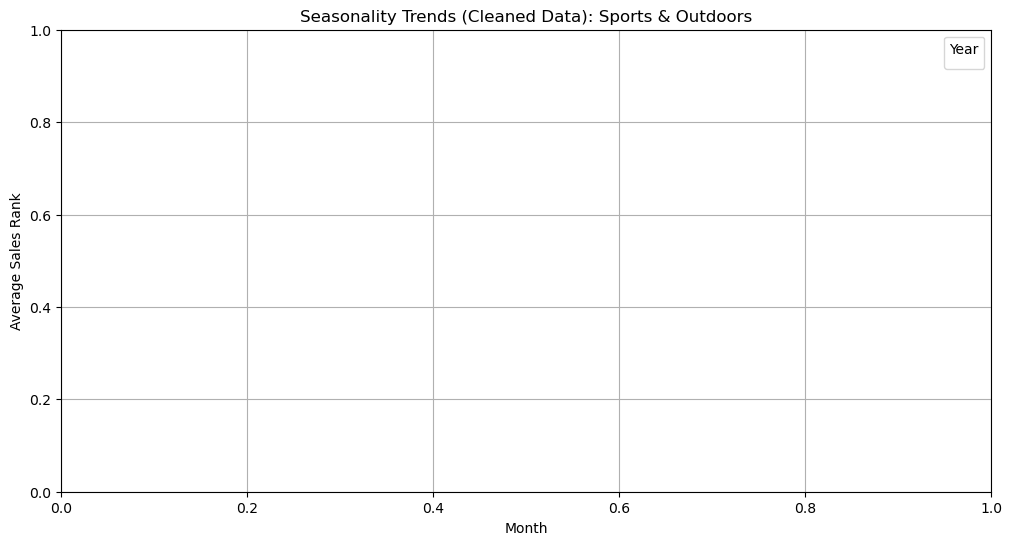

In [85]:
# Group and aggregate
sample_category = "Sports & Outdoors"
sample_data = seasonality_data[
    seasonality_data['Categories: Sub'] == sample_category
].groupby(['Tracking Year', 'Tracking Month'], as_index=False)['Sales Rank: Current'].mean()

# Plot sales rank trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sample_data, 
    x='Tracking Month', 
    y='Sales Rank: Current', 
    hue='Tracking Year',
    marker='o'
)
plt.title(f"Seasonality Trends (Cleaned Data): {sample_category}")
plt.xlabel("Month")
plt.ylabel("Average Sales Rank")
plt.legend(title="Year")
plt.grid()
plt.show()


In [ ]:
# Check data types
print(seasonality_data.dtypes)

# Inspect the problematic column for non-numeric entries
print(seasonality_data['New, 3rd Party FBA: Current'].unique())



Sales Rank: Current                   float64
Sales Rank: 30 days avg.              float64
Sales Rank: 90 days avg.              float64
Amazon: Lowest                        float64
New: Current                          float64
New, 3rd Party FBA: Current           float64
Tracking since                         object
Last Price Change                      object
Categories: Sub                        object
Categories: Root                       object
Tracking Date                  datetime64[ns]
Tracking Year                           int64
Tracking Month                          int64
dtype: object
[ 0.   25.42 14.66 16.99 16.97 27.97 23.99 19.99 25.48 21.99 23.61 26.
 20.89 24.53 10.99 13.99 17.99 12.99 15.49 29.99 39.99 24.54 49.89 21.14
 26.93 57.94 24.99]


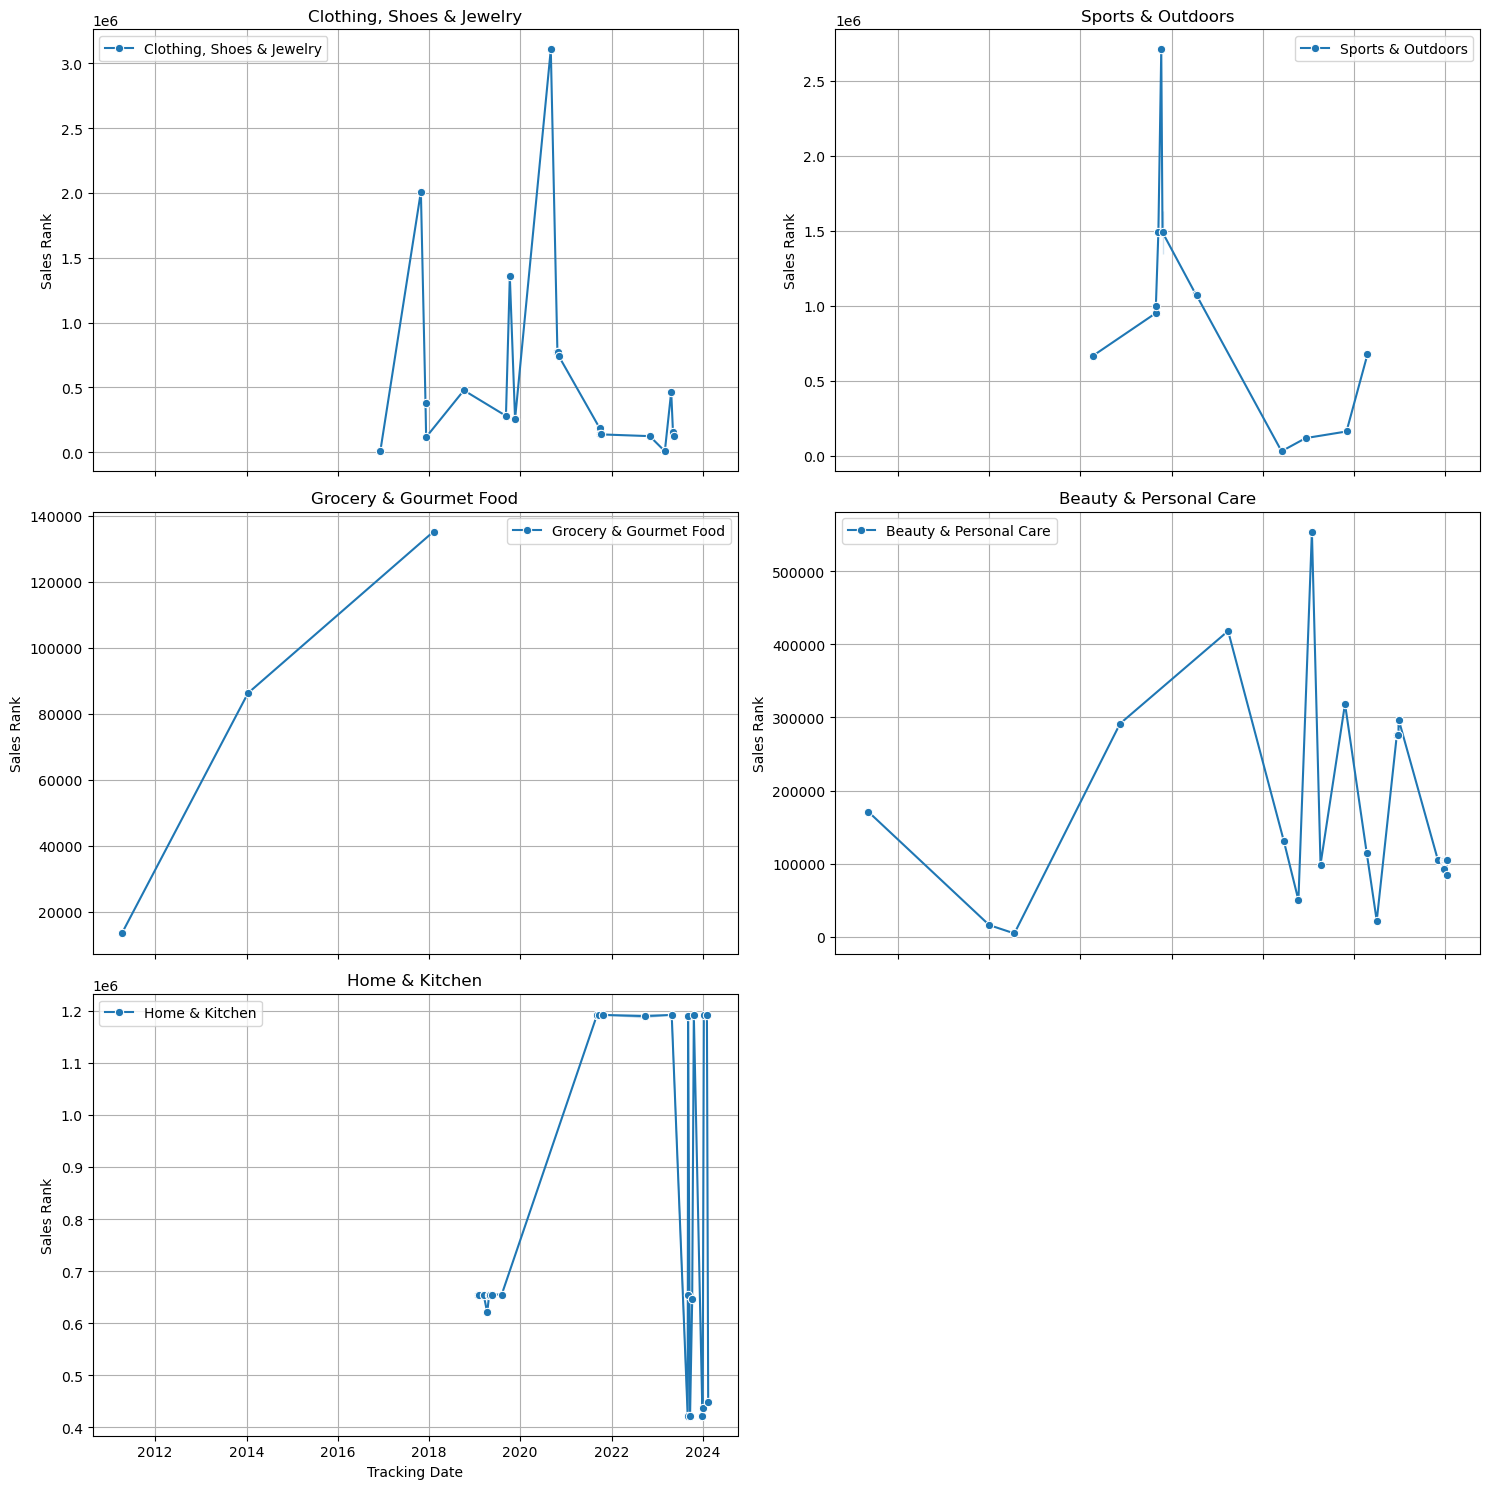

In [86]:
# Get unique root categories
root_categories = seasonality_data['Categories: Root'].unique()

# Set up the grid dimensions
n_categories = len(root_categories)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols  # Calculate rows needed for 3 columns

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=False)
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over each root category and plot its trends
for i, root_category in enumerate(root_categories):
    # Filter data for the current root category
    category_data = seasonality_data[seasonality_data['Categories: Root'] == root_category]
    
    # Plot the trends
    sns.lineplot(
        data=category_data,
        x='Tracking Date',
        y='Sales Rank: Current',
        ax=axes[i],
        marker='o',
        label=root_category
    )
    
    # Set title and labels for the subplot
    axes[i].set_title(root_category)
    axes[i].set_xlabel('Tracking Date')
    axes[i].set_ylabel('Sales Rank')
    axes[i].grid(True)
    
# Remove empty subplots if the number of categories is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

